In [1]:
import pandas as pd
import numpy as np

In [2]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


In [4]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [ ]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']

In [ ]:
df_final.head(2)

,Open,Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,6 day before Close,6 day before Volume,6 day before Adj Close,7 day before Open,7 day before High,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0.933579,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,-0.5574,-0.0516,0.5719,-0.8658,-0.296,-0.4404,-0.3182,0.5612,-0.7351,-0.2732,-0.8402,-0.6486,-0.4767,0.1779,-0.1027,-0.5859,0.3818,0,-0.4019,-0.3182,-0.9509,-0.3818,-0.9618,-0.9432,0
1,0.897638,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,0.90964,-0.756853,0.90964,0.917109,0.918651,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,0,-0.4141,0.4019,-0.8934,-0.6124,-0.91,-0.3612,0.7003,-0.8402,-0.7096,0.6705,0.4019,-0.5423,0,-0.3182,0.7351,0,-0.7579,-0.3182,0,-0.9578,0,-0.872,-0.5423,-0.875


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)
import tensorflow as tf

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
y_train = np.array(y_train,ndmin=2)

In [ ]:
features = x_train.shape[1]
x = tf.placeholder(tf.float32, shape=[x_train.shape[0],x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[y_train.shape[0],y_train.shape[1]])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
predict = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
update = tf.train.GradientDescentOptimizer(0.005).minimize(loss)
data_x = x_train.to_numpy()
data_y = y_train

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(0,5000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    # if i+1 % 10 == 0 :
    #     print('Iteration:' , i+1 , ' W(1->5):' , sess.run(W[0:5]) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

In [ ]:
y_test = np.array(y_test, ndmin=2)
x_test_p = tf.placeholder(tf.float32, shape=[None,x_test.shape[1]])
y_test_p = tf.placeholder(tf.float32, shape=[None,y_test.shape[1]])
predict = tf.matmul(x_test_p,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_test_p, 2))

In [ ]:
sess.run(loss, feed_dict = {x_test_p: x_test, y_test_p: y_test})

0.28245184

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

In [59]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]

In [93]:
# https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
def next_batch(num, data, labels):
    data['y'] = labels
    data = data.sample(num)
    data_shuffle = data.sample(num)
    labels_shuffle = np.array(data['y'], ndmin=2)
    return np.asarray(data_shuffle), labels_shuffle.reshape((data.shape[0], 1))

In [41]:
y_train = np.array(y_train,ndmin=2)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
step_size = 0.01
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (1228, 1228, 612, 1, 1 )

In [278]:
minVal=-0.0001
maxVal=0.0001

x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random.uniform(shape=[x_train.shape[1], hidden1_size], minval=minVal, maxval=maxVal))
b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal, maxval=maxVal))
b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal, maxval=maxVal))
z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

W5 = tf.Variable(tf.random.uniform([hidden4_size, hidden5_size], minval=minVal, maxval=maxVal))
b5 = tf.Variable(tf.random.uniform(shape=[hidden5_size], minval=minVal, maxval=maxVal))
# z5 = tf.nn.relu(tf.matmul(z4,W5)+b5)

# W6 = tf.Variable(tf.random.uniform([hidden5_size, 1], minval=minVal, maxval=maxVal))
# b6 = tf.Variable(tf.random.uniform(shape=[1], minval=minVal, maxval=maxVal))

predict = tf.matmul(z4,W5) + b5
# predict = tf.matmul(z5,W6) + b6

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
test_losses = []
batch_xn, batch_yn = next_batch(train_size, x_train, y_train)
batch_xt, batch_yt = next_batch(test_size, x_test, y_test)
sess.run(init)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [279]:
for i in range (10):
    for _ in range(10):
      sess.run(train_step, feed_dict={x: batch_xn, y_: batch_yn})
    temp_loss = sess.run(loss, feed_dict={x: batch_xn, y_: batch_yn})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict={x: batch_xt, y_: batch_yt})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)

iter: 1 , loss: 0.30149427
iter: 2 , loss: 0.2941124
iter: 3 , loss: 0.28937545
iter: 4 , loss: 0.2863692
iter: 5 , loss: 0.28448984
iter: 6 , loss: 0.28333947
iter: 7 , loss: 0.28265667
iter: 8 , loss: 0.28227046
iter: 9 , loss: 0.28206953
iter: 10 , loss: 0.28198186


In [280]:
step_size = step_size/50
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

In [281]:
for i in range (20):
    for _ in range(10):
      sess.run(train_step, feed_dict={x: batch_xn, y_: batch_yn})
    temp_loss = sess.run(loss, feed_dict={x: batch_xn, y_: batch_yn})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict={x: batch_xt, y_: batch_yt})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)

iter: 1 , loss: 0.2819809
iter: 2 , loss: 0.28198
iter: 3 , loss: 0.2819791
iter: 4 , loss: 0.28197825
iter: 5 , loss: 0.2819774
iter: 6 , loss: 0.28197658
iter: 7 , loss: 0.2819758
iter: 8 , loss: 0.28197503
iter: 9 , loss: 0.28197432
iter: 10 , loss: 0.2819736
iter: 11 , loss: 0.2819729
iter: 12 , loss: 0.28197217
iter: 13 , loss: 0.28197157
iter: 14 , loss: 0.28197092
iter: 15 , loss: 0.28197032
iter: 16 , loss: 0.28196976
iter: 17 , loss: 0.28196916
iter: 18 , loss: 0.28196862
iter: 19 , loss: 0.28196812
iter: 20 , loss: 0.2819676


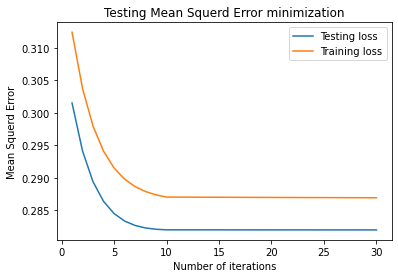

In [283]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Testing Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()